In [1]:
from HTC import HTC
from HTC_plot import plotHTC

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plotter = plotHTC()

Init plotter


In [3]:
folder = 'results/connectome/'
mod = HTC.loadFromName(folder+'connectome_66_0.0_1.5_0.01_50_0.73_0')

CREATED Network=connectome, N=66, id=0 ...



Per tre valori dell'order parameter ($T<T_c$, $T=T_c$, $T>T_c$), ho plottato:
- uno sketch della time series del valore medio di attivazione
- uno sketch della time series del valore medio di attivazione per la rete normalizzata
- Power spectrum dell'attivazione
- Autocorrelation function

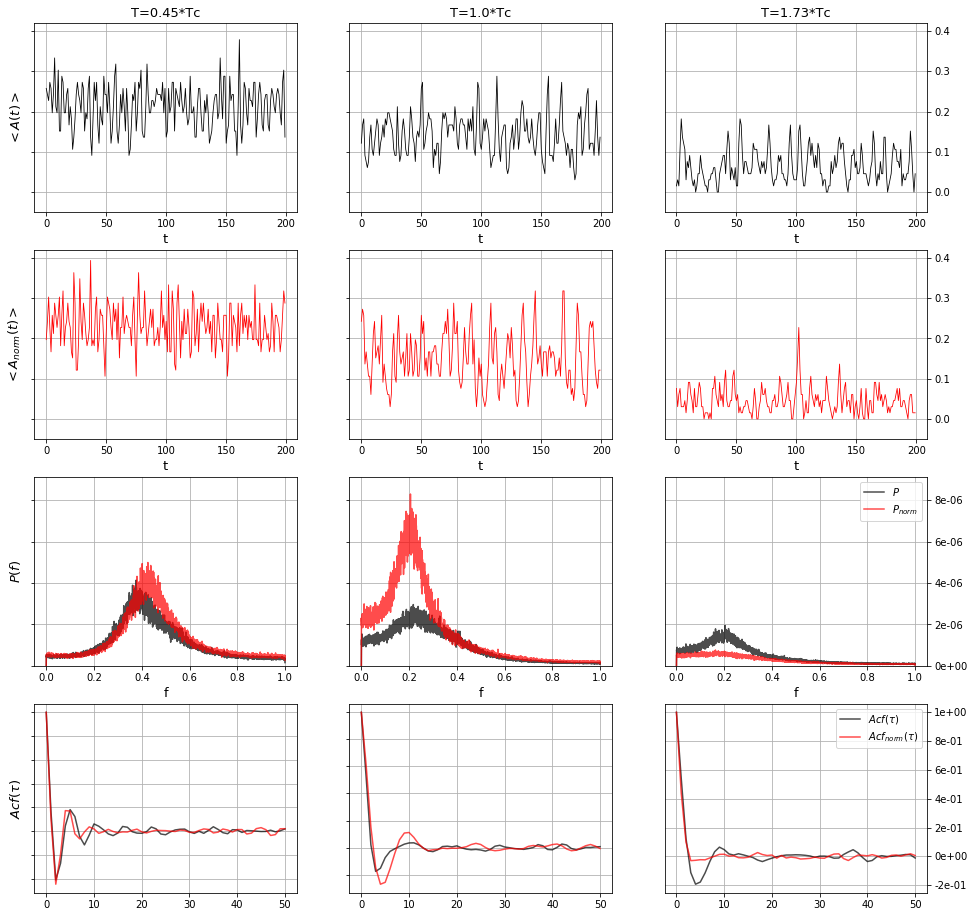

In [4]:
plotter.plot_series(mod)

Di seguito invece ho plottato (per la rete originiale e normalizzata) al variare del parametro di soglia:
- Activity
- First and second cluster size
- Correlazione tra i nodi

In [ ]:
plotter.plot_variable(mod, 'act')
plotter.plot_variable(mod, 'cluster')
plotter.plot_variable(mod, 'fisher')

# Pdf cluster size

In [ ]:
plotter.plot_pdf(mod, 'cluster')

# Pdf interevent time

In [ ]:
plotter.plot_pdf(mod, 'ev', scale='log')

# Pdf avalanches

In [ ]:
plotter.plot_pdf(mod, 'size', Nbins=None, yrange=[1e-5, 1], scale='log')

In [ ]:
plotter.plot_pdf(mod, 'time', Nbins=None, yrange=[1e-5, 1], scale='log')

# Pdf causal avalanches

In [ ]:
plotter.plot_pdf(mod, 'size_causal', Nbins=None, yrange=[3e-6, 3], scale='loglog')
plotter.plot_pdf(mod, 'size_causal', Nbins=None, yrange=[3e-6, 3], scale='log')

In [ ]:
plotter.plot_pdf(mod, 'time_causal', Nbins=None, yrange=[3e-6, 3], scale='loglog')
plotter.plot_pdf(mod, 'time_causal', Nbins=None, yrange=[3e-6, 3], scale='log')

# Dynamical range

In [ ]:
plotter.plot_stimulated(mod)

In [ ]:
plotter.plot_dynamical_range(mod, low=0.2, high=0.8)

import matplotlib.pyplot as plt
import numpy as np

i = 0

Amax, Amin = np.max(mod.Exc_norm[i]), np.min(mod.Exc_norm[i])
A9 = 0.8*(Amax-Amin) + Amin
A1 =  0.2*(Amax-Amin) + Amin

plt.figure()
plt.xscale('log')
plt.plot(mod.stimuli, mod.Exc[i])
plt.axhline(A9)
plt.axhline(A1)
plt.show()

In [ ]:
folder = 'results/connectome_05/'
mod2 = HTC.loadFromName(folder+'connectome_66_0.0_1.5_0.01_50_0.73_0')

In [ ]:
import powerlaw

results = powerlaw.Fit(mod.pdf_size_causal[25])
print(results.power_law.alpha)
print(results.power_law.xmin)

In [ ]:
tt = 25

flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size[tt][1][i].astype(int) for i in range(len(mod.pdf_size[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]

In [ ]:
len(flat_list)

In [ ]:
for tt in range(len(mod.Trange)):
    flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size_causal[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal[tt][0]))]
    flat_list = [item for sublist in flat_list for item in sublist]
    
    results = powerlaw.Fit(flat_list, xmin=1.)
    print('alpha:', results.power_law.alpha)
    print('xmin:', results.power_law.xmin)

In [ ]:
flat_list = [ [mod.pdf_size[tt][0][i]] * mod.pdf_size[tt][1][i].astype(int) for i in range(len(mod.pdf_size[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]
    
results = powerlaw.Fit(flat_list)
print('alpha:', results.power_law.alpha)
print('xmin:', results.power_law.xmin)

In [ ]:
results.plot_pdf()
#results.power_law.plot_pdf(flat_list)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tt = np.argmax(mod.S2)
tt_norm = np.argmax(mod.S2_norm)

In [ ]:
x = mod.pdf_size_causal[tt][0]
y = mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1] )

x, y = x[y>0], y[y>0]

xmin = 1
xmax = 15

x, y = x[x>xmin], y[x>xmin]
x, y = x[x<xmax], y[x<xmax]

m, q = np.polyfit(x, np.log(y), 1)
print(m, q)

In [ ]:
x = mod.pdf_size_causal_norm[tt_norm][0]
y = mod.pdf_size_causal_norm[tt_norm][1] / sum(mod.pdf_size_causal_norm[tt_norm][1] )

x, y = x[y>0], y[y>0]

xmin = 1
xmax = 15

x, y = x[x>xmin], y[x>xmin]
x, y = x[x<xmax], y[x<xmax]

m_norm, q_norm = np.polyfit(x, np.log(y), 1)
print(m_norm, q_norm)

In [ ]:
#plt.xscale('log')
plt.yscale('log')

plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.plot(mod.pdf_size_causal_norm[tt_norm][0], mod.pdf_size_causal_norm[tt_norm][1] / sum(mod.pdf_size_causal_norm[tt_norm][1]), 'o')

xx = np.arange(xmin, xmax)
plt.plot(xx, np.exp(m*xx + q))

plt.show()

In [13]:
for tt in range(len(mod.Trange)):
    flat_list = [ [mod.pdf_size_causal_norm[tt][0][i]] * mod.pdf_size_causal_norm[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal_norm[tt][0]))]
    flat_list = [item for sublist in flat_list for item in sublist]
    
    results = powerlaw.Fit(flat_list)
    print('alpha:', results.power_law.alpha)
    print('xmin:', results.power_law.xmin)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.903833493073085
xmin: 32.411515151515125
alpha: 9.826698600686328
xmin: 29.806515151515114


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.76959508015758
xmin: 18.763333333333325
alpha: 5.850270947833771
xmin: 19.081363636363626


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.080300082450237
xmin: 20.341212121212124
alpha: 8.730443945211004
xmin: 0.632575757575757


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.838205618592342
xmin: 19.664393939393918
alpha: 6.920572659557863
xmin: 26.206969696969686


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.0173019972759985
xmin: 14.99015151515151
alpha: 6.049409850926669
xmin: 21.484242424242417


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.249035122471579
xmin: 26.595454545454583
alpha: 8.210532500461298
xmin: 0.5786363636363636


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.510887517812806
xmin: 23.178787878787844
alpha: 8.37439943938067
xmin: 0.5921212121212116


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.554049222635859
xmin: 21.44999999999999
alpha: 5.8580003680467465
xmin: 20.479545454545455


Calculating best minimal value for power law fit


alpha: 8.536461969738333
xmin: 0.6124242424242415


Calculating best minimal value for power law fit


alpha: 9.081483316332916
xmin: 30.97196969696968
alpha: 5.8102000025654075
xmin: 19.467878787878767


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.671195837093215
xmin: 21.749848484848485
alpha: 7.6591423314010125
xmin: 0.5162121212121212


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.658363870375699
xmin: 0.5087878787878788
alpha: 6.910866928440262
xmin: 22.09484848484849


Calculating best minimal value for power law fit


alpha: 7.102038082042637
xmin: 27.314090909090886


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.220633538202329
xmin: 15.455454545454526
alpha: 6.099964801587342
xmin: 19.80696969696969


Calculating best minimal value for power law fit
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha: 9.502177557755488
xmin: 0.7050000000000005
alpha: 6.820165553974322
xmin: 21.417424242424254


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.720489706282638
xmin: 24.846818181818175
alpha: 7.504666390971986
xmin: 0.4943939393939388


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.1283828301456
xmin: 25.352878787878794
alpha: 6.8793073127450795
xmin: 0.4371212121212124


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 9.292986636283015
xmin: 0.678787878787879
alpha: 7.3450558332905995
xmin: 22.106060606060588


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 4.6843385442998535
xmin: 13.220606060606055
alpha: 5.9144508834107405
xmin: 18.531212121212135


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.171678232573935
xmin: 0.5545454545454538
alpha: 10.882204458373533
xmin: 25.936969696969676


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 11.619975916694193
xmin: 27.496060606060603
alpha: 8.063350737298867
xmin: 27.4551515151515


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.343409070070689
xmin: 21.18151515151515
alpha: 6.885181461557907
xmin: 19.07878787878787


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.43864906949969
xmin: 0.5837878787878791
alpha: 8.786817505360862
xmin: 26.593939393939365


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.5815520001949155
xmin: 21.60681818181817
alpha: 6.560147985731949
xmin: 15.631969696969707


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.869635427977713
xmin: 18.557121212121217


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 9.747473878800848
xmin: 21.219393939393953
alpha: 5.576021631223765
xmin: 12.187878787878802


Calculating best minimal value for power law fit


alpha: 4.870031856855654
xmin: 10.02515151515152


Calculating best minimal value for power law fit


alpha: 5.727018622452578
xmin: 11.856818181818193
alpha: 13.64893550066216
xmin: 20.549242424242433


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.9178394197267
xmin: 13.753787878787882
alpha: 6.9333960631202505
xmin: 13.775151515151519


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.496401220443058
xmin: 15.154696969696985
alpha: 4.781610526041536
xmin: 7.388181818181823


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.3103004611438545
xmin: 10.988333333333337
alpha: 8.137525148753827
xmin: 15.39075757575759


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.0386429021093635
xmin: 9.487424242424254
alpha: 8.614889945502643
xmin: 12.31712121212122


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.5540596033787955
xmin: 10.261515151515152
alpha: 9.535788261925598
xmin: 12.82348484848485


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.543770168089862
xmin: 8.05378787878788
alpha: 7.926847218305334
xmin: 9.315151515151523


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.995933398122603
xmin: 7.855606060606068
alpha: 5.723348323192685
xmin: 5.47545454545455


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.143412973536515
xmin: 4.721515151515156
alpha: 7.853074165252607
xmin: 8.011060606060612


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.070894813062925
xmin: 3.9669696969697004
alpha: 6.336053248515092
xmin: 5.4507575757575815


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 8.068503332430389
xmin: 7.105909090909096
alpha: 10.25779986892172
xmin: 6.362878787878797


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.230723508678302
xmin: 4.172727272727279
alpha: 7.388729095137643
xmin: 4.686515151515156


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 10.878663951276266
xmin: 6.156818181818185
alpha: 7.155548544446515
xmin: 4.337878787878791


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 5.427101875879244
xmin: 2.8416666666666686
alpha: 7.818157013434336
xmin: 4.273636363636369


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.1644144828343395
xmin: 2.8789393939393957
alpha: 9.1663430016807
xmin: 3.970606060606065


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 13.443738175629754
xmin: 3.9939393939393977
alpha: 6.628121811150231
xmin: 2.5515151515151526


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 9.322230941485728
xmin: 3.3401515151515158
alpha: 8.600140998262436
xmin: 2.5928787878787873


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 10.301908478566453
xmin: 3.1021212121212107
alpha: 8.028265217974083
xmin: 2.2637878787878787


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.165383245899774
xmin: 1.9501515151515156
alpha: 9.462122752860731
xmin: 2.1459090909090923


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 7.50188216478693
xmin: 1.873484848484848
alpha: 7.773526899202277
xmin: 1.8042424242424242


Calculating best minimal value for power law fit


alpha: 10.73075884472401
xmin: 1.9469696969696957


Calculating best minimal value for power law fit


alpha: 12.023516279993192
xmin: 2.0734848484848474


Calculating best minimal value for power law fit


alpha: 12.18150671820523
xmin: 2.2410606060606044
alpha: 7.283006050117492
xmin: 1.3112121212121206


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 11.272745703809038
xmin: 1.5489393939393934
alpha: 8.929032940630961
xmin: 1.3828787878787876


Calculating best minimal value for power law fit


alpha: 8.443491733170518
xmin: 1.2624242424242418


Calculating best minimal value for power law fit


alpha: 8.786303128909223
xmin: 1.099242424242424


Calculating best minimal value for power law fit


alpha: 18.44134030458046
xmin: 1.5833333333333326


Calculating best minimal value for power law fit


alpha: 11.564033257433072
xmin: 1.2756060606060602


Calculating best minimal value for power law fit


alpha: 7.785603865505333
xmin: 0.8227272727272723


Calculating best minimal value for power law fit


alpha: 12.757759349399507
xmin: 1.2628787878787873
alpha: 11.279233325576222
xmin: 1.097575757575757


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha: 6.2364607153632035
xmin: 0.5942424242424242


Calculating best minimal value for power law fit


alpha: 10.308387816444597
xmin: 0.8904545454545454


Calculating best minimal value for power law fit


alpha: 6.339435992803426
xmin: 0.5348484848484847


Calculating best minimal value for power law fit


alpha: 8.389139280746871
xmin: 0.7854545454545452


Calculating best minimal value for power law fit


alpha: 7.324530801532817
xmin: 0.5848484848484847


Calculating best minimal value for power law fit


alpha: 9.726067124720696
xmin: 0.787272727272727


Calculating best minimal value for power law fit


alpha: 9.373340962443383
xmin: 0.7842424242424239


Calculating best minimal value for power law fit


alpha: 8.611347127360828
xmin: 0.6765151515151513


Calculating best minimal value for power law fit


alpha: 7.216767651116853
xmin: 0.4646969696969696


Calculating best minimal value for power law fit


alpha: 8.802504792433904
xmin: 0.6487878787878787


Calculating best minimal value for power law fit


alpha: 9.100385629979307
xmin: 0.5651515151515152


Calculating best minimal value for power law fit


alpha: 6.640465694689001
xmin: 0.3704545454545454


Calculating best minimal value for power law fit


alpha: 8.687585442849443
xmin: 0.5483333333333333


Calculating best minimal value for power law fit


alpha: 7.414569912760355
xmin: 0.4022727272727272


Calculating best minimal value for power law fit


alpha: 7.3088201275976585
xmin: 0.3995454545454544


Calculating best minimal value for power law fit


alpha: 8.909806046204732
xmin: 0.47545454545454535


Calculating best minimal value for power law fit


alpha: 8.148536361002954
xmin: 0.3995454545454544


Calculating best minimal value for power law fit


alpha: 11.808158086969033
xmin: 0.5506060606060605


Calculating best minimal value for power law fit


alpha: 12.018434190440898
xmin: 0.5687878787878786


Calculating best minimal value for power law fit


alpha: 13.12640768203257
xmin: 0.5234848484848484


Calculating best minimal value for power law fit


alpha: 9.61889653555271
xmin: 0.5506060606060605


Calculating best minimal value for power law fit


alpha: 6.086808233753524
xmin: 0.26969696969696966


Calculating best minimal value for power law fit


alpha: 14.23053234898564
xmin: 0.5234848484848484


Calculating best minimal value for power law fit


alpha: 11.187623351593171
xmin: 0.4568181818181818


Calculating best minimal value for power law fit


alpha: 9.34703795951966
xmin: 0.4015151515151515


Calculating best minimal value for power law fit


alpha: 6.935213030901619
xmin: 0.2618181818181818


Calculating best minimal value for power law fit


alpha: 7.484629595559232
xmin: 0.3319696969696969


Calculating best minimal value for power law fit


alpha: 6.862922328010614
xmin: 0.2196969696969696


Calculating best minimal value for power law fit


alpha: 9.730680279900733
xmin: 0.3925757575757576


Calculating best minimal value for power law fit


alpha: 8.573303494587531
xmin: 0.3083333333333333
alpha: 8.984250069929798
xmin: 0.3401515151515152


Calculating best minimal value for power law fit


KeyboardInterrupt: 

In [7]:
import powerlaw
import numpy as np
import matplotlib.pyplot as plt

In [46]:
tt = np.argmax(mod.S2)

flat_list = [ [mod.pdf_size_causal[tt][0][i]] * mod.pdf_size_causal[tt][1][i].astype(int) for i in range(len(mod.pdf_size_causal[tt][0]))]
flat_list = [item for sublist in flat_list for item in sublist]

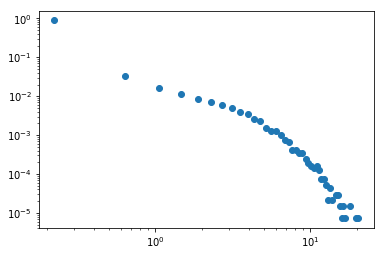

In [37]:
plt.xscale('log')
plt.yscale('log')

plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.show()

In [70]:
results = powerlaw.Fit(flat_list, xmin=15)
print('alpha', results.power_law.alpha)
print('xmin', results.power_law.xmin)

alpha 11.20690782754601
xmin 15.0


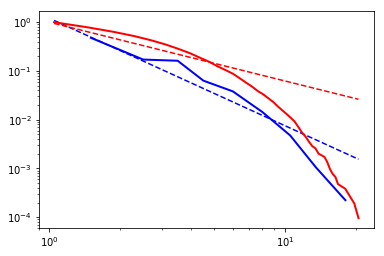

In [53]:
fig2 = results.plot_pdf(color='b', linewidth=2)
results.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
results.plot_ccdf(color='r', linewidth=2, ax=fig2)
results.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
plt.show()

In [57]:
exp_x = results.exponential.pdf()

In [59]:
x, y = results.cdf()
print(x)

[ 1.04772727  1.46075758  1.87378788  2.28681818  2.69984848  3.11287879
  3.52590909  3.93893939  4.3519697   4.765       5.1780303   5.59106061
  6.00409091  6.41712121  6.83015152  7.24318182  7.65621212  8.06924242
  8.48227273  8.89530303  9.30833333  9.72136364 10.13439394 10.54742424
 10.96045455 11.37348485 11.78651515 12.19954545 12.61257576 13.02560606
 13.43863636 13.85166667 14.67772727 15.09075758 15.50378788 15.91681818
 16.32984848 16.74287879 17.9819697  19.63409091 20.46015152]


In [60]:
x, y = results.pdf()
print(x)

[ 1.  2.  3.  4.  5.  6.  8. 10. 12. 16. 21.]


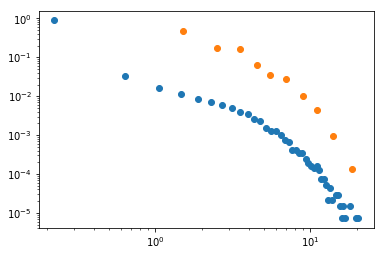

In [64]:
plt.xscale('log')
plt.yscale('log')
plt.plot(mod.pdf_size_causal[tt][0], mod.pdf_size_causal[tt][1] / sum(mod.pdf_size_causal[tt][1]), 'o')
plt.plot((x[1:]+x[:-1])/2, y, 'o')


plt.show()

In [114]:
import networkx as nx
import numpy as np

In [119]:
N = 60
k = 10

deg = []

for i in range(10000):

    random = nx.generators.random_graphs.erdos_renyi_graph(n=N, p=k/N)

    tmp = sum(x for i,x in random.degree) / N
    
    deg.append(tmp)
    
print(np.mean(deg), np.std(deg))

9.82699 0.5145538368442228


In [150]:
N = 60
k = 10

m = 10

deg = []

for i in range(10000):

    random = nx.generators.random_graphs.barabasi_albert_graph(n=N, m=m)

    tmp = sum(x for i,x in random.degree) / N
    
    deg.append(tmp)
    
print(np.mean(deg), np.std(deg))

16.666666666666664 3.552713678800501e-15


In [151]:
km = (N-m) * m/N * 2
km

16.666666666666668

In [154]:
m = ( N - np.sqrt(N**2 - 2*N*km) ) / 2
m

10.0